In [1]:
from fastai.vision import *

In [2]:
#working on white

folder = 'white'
file = 'urls_white.txt'

In [3]:
path = Path('data/animals')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [4]:
path.ls()

[PosixPath('data/animals/urls_white.txt'),
 PosixPath('data/animals/.ipynb_checkpoints'),
 PosixPath('data/animals/white'),
 PosixPath('data/animals/black'),
 PosixPath('data/animals/urls_black.txt')]

In [5]:
classes = ['white']

In [6]:
download_images(path/file, dest, max_pics=200)

In [7]:
for c in classes:
    print(c)
    verify_images(path/c, delete = True, max_size = 500)

white


cannot identify image file <_io.BufferedReader name='data/animals/white/00000134.jpg'>
cannot identify image file <_io.BufferedReader name='data/animals/white/00000019.jpg'>
cannot identify image file <_io.BufferedReader name='data/animals/white/00000058.jpg'>
cannot identify image file <_io.BufferedReader name='data/animals/white/00000066.jpg'>
cannot identify image file <_io.BufferedReader name='data/animals/white/00000127.jpg'>
cannot identify image file <_io.BufferedReader name='data/animals/white/00000076.jpg'>


In [8]:
folder = 'black'
file = 'urls_black.txt'

In [9]:
path = Path('data/animals')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [10]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [11]:
data.classes

['black', 'white']

In [12]:
#working on black

folder = 'black'
file = 'urls_black.txt'

In [13]:
path = Path('data/animals')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [14]:
path.ls()

[PosixPath('data/animals/urls_white.txt'),
 PosixPath('data/animals/.ipynb_checkpoints'),
 PosixPath('data/animals/white'),
 PosixPath('data/animals/black'),
 PosixPath('data/animals/urls_black.txt')]

In [15]:
classes = ['black']

In [16]:
download_images(path/file, dest, max_pics=20, max_workers=0)

In [17]:
for c in classes:
    print(c)
    verify_images(path/c, delete = True, max_size = 500)

black


cannot identify image file <_io.BufferedReader name='data/animals/black/00000012.jpg'>


In [18]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [19]:
data.classes

['black', 'white']

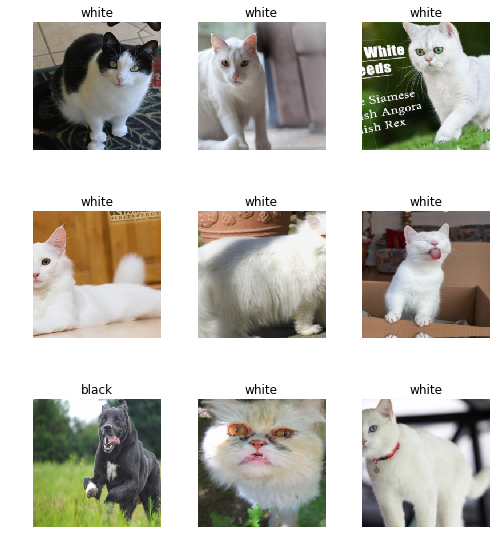

In [23]:
#display

data.show_batch(rows = 3, figsize = (7,8))

In [25]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'white'], 2, 170, 42)

In [27]:
# train the model

learn = cnn_learner(data, models.resnet34, metrics = error_rate)

In [28]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.916346,0.360523,0.071429,00:03
1,0.806309,0.098399,0.000000,00:02
2,0.678890,0.065277,0.000000,00:02
3,0.613389,0.079514,0.023809,00:02


In [29]:
learn.save('stage-1')

In [31]:
learn.unfreeze()

In [32]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


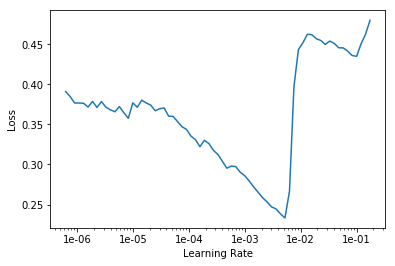

In [34]:
learn.recorder.plot()

In [42]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.310550,0.710396,0.261905,00:02
1,0.286001,0.427084,0.095238,00:02


In [43]:
learn.save('stage-2')

In [44]:
#interpretation

learn.load('stage-2');

In [45]:
interp = ClassificationInterpretation.from_learner(learn)

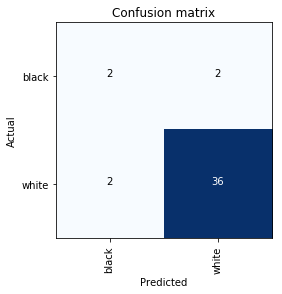

In [46]:
interp.plot_confusion_matrix()

In [47]:
from fastai.widgets import *

In [48]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

In [49]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [50]:
ds, idxs = DatasetFormatter().from_similars(learn, ds_type=DatasetType.Valid)

Getting activations...


Computing similarities...


In [51]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [52]:
#model production

learn.export()

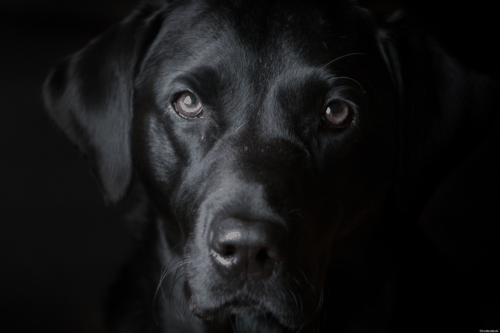

In [68]:
img = open_image(path/'black'/'00000015.gif')
img                 

In [69]:
learn = load_learner(path)

In [70]:
pred_class, pred_idx, outputs = learn.predict(img)
pred_class

Category black